In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
train = pd.read_csv('../data/playground-series-s5e6/train.csv')
test  = pd.read_csv('../data/playground-series-s5e6/test.csv')

# Aperçu
print(train.shape, test.shape)
display(train.head(), train.info())


(750000, 10) (250000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


None

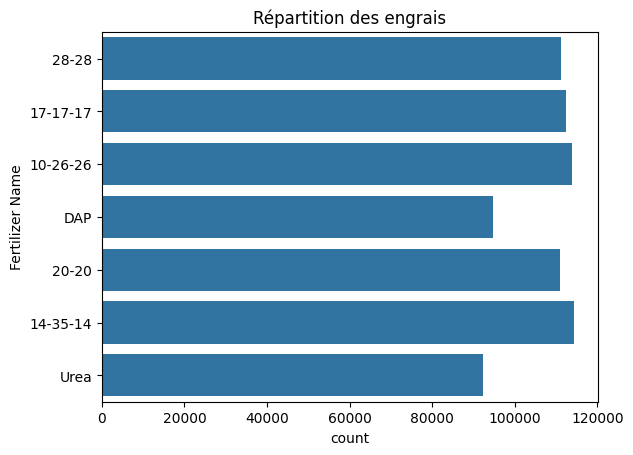

In [2]:
sns.countplot(y='Fertilizer Name', data=train)
plt.title("Répartition des engrais")
plt.show()

In [3]:
train.describe().value_counts()

id             Temparature    Humidity       Moisture       Nitrogen       Potassium      Phosphorous  
0.000000       25.000000      50.000000      25.000000      4.000000       0.000000       0.000000         1
187499.750000  28.000000      55.000000      35.000000      13.000000      4.000000       10.000000        1
216506.495284  4.025574       6.647695       11.794594      11.216125      5.765622       12.346831        1
374999.500000  31.503565      61.038912      45.184147      23.093808      9.478296       21.073227        1
               32.000000      61.000000      45.000000      23.000000      9.000000       21.000000        1
562499.250000  35.000000      67.000000      55.000000      33.000000      14.000000      32.000000        1
749999.000000  38.000000      72.000000      65.000000      42.000000      19.000000      42.000000        1
750000.000000  750000.000000  750000.000000  750000.000000  750000.000000  750000.000000  750000.000000    1
Name: count, dtype: int6

<Axes: >

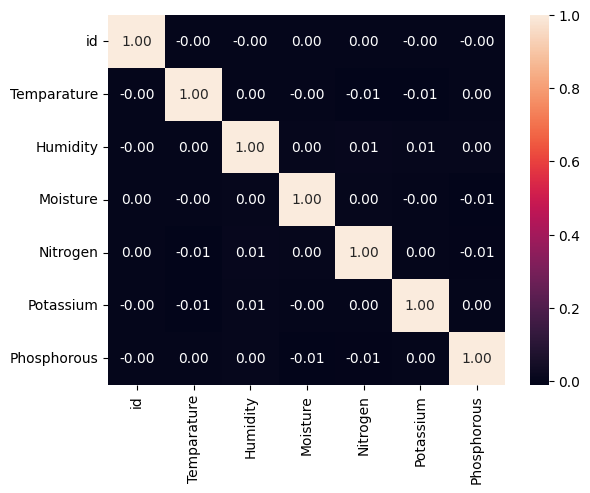

In [4]:
# Vérifier qu elle facteurs est le plus important à prendre en considération
num_cols = train.select_dtypes(include='number').columns
sns.heatmap(train[num_cols].corr(), annot=True, fmt=".2f")


In [5]:
train.isna().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [6]:
# Affiche la liste de toutes les colonnes
print(train.columns.tolist())

# Ou mieux, repère toutes les colonnes de type 'object'
print(train.select_dtypes(include='object').columns.tolist())

['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
['Soil Type', 'Crop Type', 'Fertilizer Name']


In [15]:
# Nombre de NaN par colonne
missing_train = train.isnull().sum()
print("NaN dans train :\n", missing_train[missing_train > 0])

NaN dans train :
 Series([], dtype: int64)
